In [3]:
import re
import os
import pandas as pd
import bs4
import numpy as np
import requests
import csv
import networkx as nx
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 



import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
DG = nx.read_gpickle("kg_srl/vanitas_meaning_KG_SRL_train.gpickle")

In [5]:
DG

In [6]:
tag2object = ['skull', 'hourglass', 'globe', 'coins', 'butterfly', 'flowers', 'watch', 'dice', 'fruit', 'violin',
        'lute', 'flute', 'candle', 'inkstand', 'music', 'bubble', 'lamp', 'book', 'glass', 'goblet', 'vase',
        'crown', 'mitre', 'mitre', 'crab', 'lobster', 'shells', 'bird', 'atlas',
        'clock', 'fish', 'smoke', 'bread', 'wine', 'shells']

def get_object_meaning(index):
    pass


In [7]:
object2meanings = {}

subgraph_nodes = []
mapping = {}

# removing stopwords would be fine
# partition the graph

for object in tag2object:
    object2meanings[object] = []
    meanings = []
    for node in DG.nodes:
        if object in node.lower():
            subgraph_nodes.append(object)
            subgraph_nodes.extend([child for child in DG.successors(node)])
            mapping[node] = object
            
#             print(object, node, nx.descendants(DG, node))
#             meanings.append(nx.descendants(DG, node))
            print(object, node, [child for child in DG.successors(node)])
            meanings.append([child for child in DG.successors(node)])
    object2meanings[object].append(meanings)


skull skulls ['reminder', 'certainty', 'death']
skull skull ['universal symbol', 'death', 'form', ' living head', 'life', 'real']
hourglass hourglasses ['brevity', 'life']
flowers flowers ['obvious style', 'purpose', 'life']
watch mechanical watch ['transience', 'time']
watch watch ['passing', 'time']
fruit fruit ['rotten', 'symbol', 'viewers']
fruit rotten fruit ['easy']
fruit Mature fruits ['fertility', 'abundance']
candle gutted candles ['easy']
candle extinguished candle ['life']
candle candles []
music music ['ephemerality']
music Musical Instruments []
bubble bubbles ['brevity', 'life', 'suddenness', 'death']
bubble soap bubble []
book Book ['vanities', 'vanity']
book book ['reminders', 'mortality', 'skull']
book bookmarks []
book biblical book ['vanityused groupings', 'objects', 'cautionary message', 'foolishness']
glass hourglasses ['brevity', 'life']
glass glass ['death']
glass Glass ['fragility']
vase Rich vases ['ostentation']
crown crowns ['leaves', 'powers', ' signs', 'tra

In [8]:
object2meanings

{'skull': [[['reminder', 'certainty', 'death'],
   ['universal symbol', 'death', 'form', ' living head', 'life', 'real']]],
 'hourglass': [[['brevity', 'life']]],
 'globe': [[]],
 'coins': [[]],
 'butterfly': [[]],
 'flowers': [[['obvious style', 'purpose', 'life']]],
 'watch': [[['transience', 'time'], ['passing', 'time']]],
 'dice': [[]],
 'fruit': [[['rotten', 'symbol', 'viewers'],
   ['easy'],
   ['fertility', 'abundance']]],
 'violin': [[]],
 'lute': [[]],
 'flute': [[]],
 'candle': [[['easy'], ['life'], []]],
 'inkstand': [[]],
 'music': [[['ephemerality'], []]],
 'bubble': [[['brevity', 'life', 'suddenness', 'death'], []]],
 'lamp': [[]],
 'book': [[['vanities', 'vanity'],
   ['reminders', 'mortality', 'skull'],
   [],
   ['vanityused groupings', 'objects', 'cautionary message', 'foolishness']]],
 'glass': [[['brevity', 'life'], ['death'], ['fragility']]],
 'goblet': [[]],
 'vase': [[['ostentation']]],
 'crown': [[['leaves',
    'powers',
    ' signs',
    'transient earthly Dom

In [9]:
H = nx.relabel_nodes(DG, mapping)

In [10]:
SG = H.subgraph(subgraph_nodes)

In [11]:
l = [n for n in SG.nodes if SG.nodes[n]['bipartite'] == 0]
r = set(SG.nodes) - set(l)


In [12]:
list(l)

['book',
 'flowers',
 'crown',
 'clock',
 'glass',
 'skull',
 'vanity',
 'brevity',
 'purpose',
 'viewers',
 'objects',
 'shortness',
 'smoke',
 'vanities',
 'vase',
 'fruit',
 'ephemerality',
 'bird',
 'death',
 'watch']

In [13]:
SG = H.subgraph(subgraph_nodes)

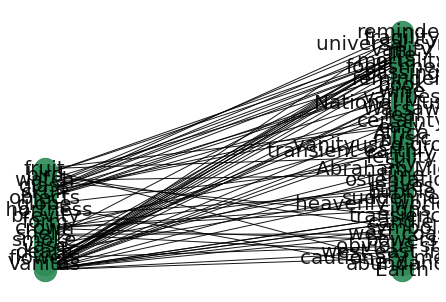

In [58]:
# Separate by group
# B = SG
# pos = {}

# # Update position for node from each group
# pos.update((node, (1, index)) for index, node in enumerate(l))
# pos.update((node, (2, index)) for index, node in enumerate(r))

# nx.draw(B, pos=pos, edge_color='black', width=1, linewidths=1,
#             node_size=500, arrowsize=0.001, node_color='seagreen', alpha=0.9,
#             labels={node: node for node in SG.nodes()}, font_size=20)
# plt.show()

In [20]:
list(l)

['',
 'bird',
 'vase',
 'skull',
 'brevity',
 'flowers',
 'form',
 'shortness',
 'glass',
 'crown',
 'fruit',
 'death',
 'watch',
 'smoke',
 'objects']

(-1.1042719512235222,
 1.199953443328932,
 -1.0621499345297691,
 1.184336794166358)

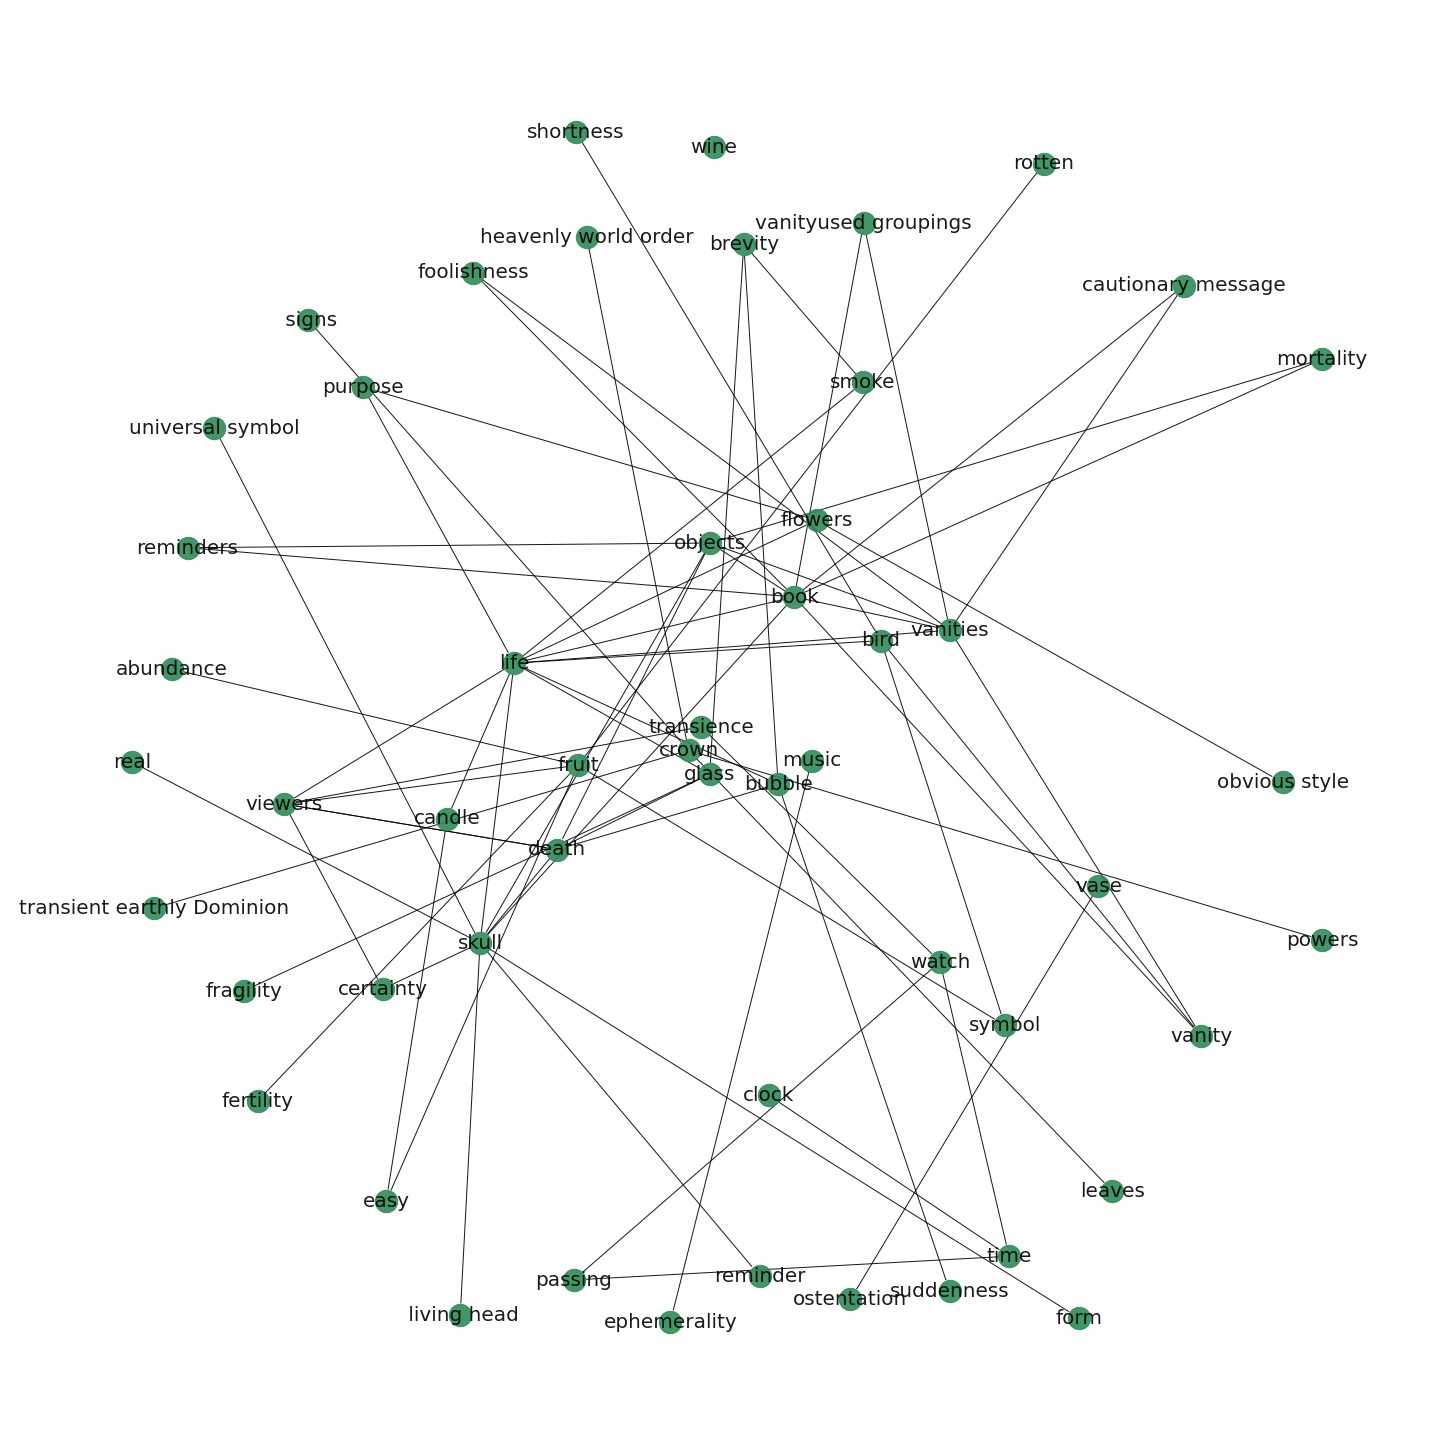

In [14]:
pos = nx.spring_layout(SG, k=3*1/np.sqrt(len(SG.nodes())), iterations=20)
plt.figure(figsize=(20,20))
nx.draw(SG, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, arrowsize=0.001, node_color='seagreen', alpha=0.9,
            labels={node: node for node in SG.nodes()}, font_size=20)
plt.axis('off')

In [23]:
file_loc = "data/validation_ids.txt"

val_dict = {}

with open( file_loc, "r") as f:
    for id, line in enumerate(f):
        tags = line.split('[')[1].split(']')[0].split(' ')
        objects_and_meanings = []
        
            
        for tag in line.split('[')[1].split(']')[0].split(' '):
            if tag:
                object = tag2node[int(tag)-1]
                meanings = []
                for node in DG.nodes:
                    if object in node.lower():
                        meanings.append(nx.descendants(DG, node))
                        print(node)
                objects_and_meanings.append({object: meanings})
        val_dict[id] = objects_and_meanings    
        print(id, line.split('[')[1].split(']')[0].split(' '))
       

a book
the orange book
books
In front of the book
with sculptural figures of philosophers with books at their feet ? to the left , Democritus , who gestures toward the globe and laughs ; and , to the right , Heraclitus , who points to the sphere and weeps . The sphere purposefully resembles a soap bubble
The other open book
a book
the orange book
books
In front of the book
with sculptural figures of philosophers with books at their feet ? to the left , Democritus , who gestures toward the globe and laughs ; and , to the right , Heraclitus , who points to the sphere and weeps . The sphere purposefully resembles a soap bubble
The other open book
gap - toothed skull
a skull
the skull
a human skull
to a vase of flowers , a human skull , small gold and silver coins , two glass vases
a human skull , small gold and silver coins , two glass vases open for the viewer to tell the time and be reminded , once again , about the inevitable passing of time
a human skull and , floating above it , a tr

In [27]:
val_dict

{0: [{'book': [{'a history of the early counts of Holland - whose lands were absorbed by the dukes of Burgundy in the 1400s',
     'a memento mori',
     'a multitude of objects',
     'a testament to the suddenness of death and the vanity of early power and glory',
     'a vanitas — a specific type of still - life that emerged in the 17th century in the Netherlands and grew out of a long artistic tradition known as memento mori , meaning “ reminders of mortality',
     'depicts',
     'human',
     'including',
     'is',
     'life - like',
     'obvious',
     'open to a map of the East Indies , source of many Dutch fortunes',
     'presenting',
     'showing',
     'smoke , show , vanity and the picture of a stage'},
    {'human knowledge',
     'symbolizes',
     'the power and possessions that death steals away'},
    {'choose'},
    set(),
    set(),
    {'a history of the early counts of Holland - whose lands were absorbed by the dukes of Burgundy in the 1400s',
     'a memento

In [88]:
# import json

# from json import dumps, loads, JSONEncoder, JSONDecoder
import pickle as pkl

with open('val_objects_and_meaning.pkl', 'wb') as f:
    pkl.dump(val_dict, f)

In [25]:
for tag in id2node:
    print(nx.descendants(DG, tag))

NameError: name 'id2node' is not defined

In [29]:
val_dict

{0: [{'book': [{'a history of the early counts of Holland - whose lands were absorbed by the dukes of Burgundy in the 1400s',
     'a memento mori',
     'a multitude of objects',
     'a testament to the suddenness of death and the vanity of early power and glory',
     'a vanitas — a specific type of still - life that emerged in the 17th century in the Netherlands and grew out of a long artistic tradition known as memento mori , meaning “ reminders of mortality',
     'depicts',
     'human',
     'including',
     'is',
     'life - like',
     'obvious',
     'open to a map of the East Indies , source of many Dutch fortunes',
     'presenting',
     'showing',
     'smoke , show , vanity and the picture of a stage'},
    {'human knowledge',
     'symbolizes',
     'the power and possessions that death steals away'},
    {'choose'},
    set(),
    set(),
    {'a history of the early counts of Holland - whose lands were absorbed by the dukes of Burgundy in the 1400s',
     'a memento

In [78]:
type(val_dict)

dict

In [7]:
import sys
sys.path.insert(0,'../fine_art_asssociations_meanings_vision')

In [17]:
from vision.vanitas_utils import VanitasDataset

ModuleNotFoundError: No module named 'mrcnn'

In [19]:
nx.descendants(DG, 'the lobster')

{'a history of the early counts of Holland - whose lands were absorbed by the dukes of Burgundy in the 1400s',
 'a memento mori',
 'a testament to the suddenness of death and the vanity of early power and glory',
 'a vanitas — a specific type of still - life that emerged in the 17th century in the Netherlands and grew out of a long artistic tradition known as memento mori , meaning “ reminders of mortality',
 'human',
 'is',
 'life - like',
 'obvious',
 'open to a map of the East Indies , source of many Dutch fortunes',
 'smoke , show , vanity and the picture of a stage'}

In [15]:
def save_admatrix_nodelist(g, src_dir, l, r):
    if not os.path.isdir(src_dir):
        os.mkdir(src_dir)
    admatix = nx.adjacency_matrix(g).todense()
    print(admatix.shape)
    np.savetxt(os.path.join(src_dir, "vanitas_meaning_AM_train.csv"), np.array(admatix, dtype=np.int), delimiter=",")

    print(len(g.nodes))
    with open(os.path.join(src_dir, 'vanitas_meaning_NL_train.csv'), 'w', newline='') as myfile:
         
         wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
         wr.writerow(list(g.nodes))
    
    with open(os.path.join(src_dir, 'vanitas_meaning_NL_objects_train.csv'), 'w', newline='') as myfile:
         wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
         wr.writerow(list(g.nodes))
    
    with open(os.path.join(src_dir, 'vanitas_meaning_NL_meanings_train.csv'), 'w', newline='') as myfile:
         wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
         wr.writerow(list(g.nodes))

In [16]:
save_admatrix_nodelist(SG, 'final_KG_train', l, r)

(53, 53)
53


In [17]:
corr = ''

for key in object2meanings.keys():
    for value in object2meanings[key]:
        for items in value:
            for item in items:
                corr += "{0} -> {1}, ".format(key, item)
        

In [18]:
corr

'skull -> reminder, skull -> certainty, skull -> death, skull -> universal symbol, skull -> death, skull -> form, skull ->  living head, skull -> life, skull -> real, hourglass -> brevity, hourglass -> life, flowers -> obvious style, flowers -> purpose, flowers -> life, watch -> transience, watch -> time, watch -> passing, watch -> time, fruit -> rotten, fruit -> symbol, fruit -> viewers, fruit -> easy, fruit -> fertility, fruit -> abundance, candle -> easy, candle -> life, music -> ephemerality, bubble -> brevity, bubble -> life, bubble -> suddenness, bubble -> death, book -> vanities, book -> vanity, book -> reminders, book -> mortality, book -> skull, book -> vanityused groupings, book -> objects, book -> cautionary message, book -> foolishness, glass -> brevity, glass -> life, glass -> death, glass -> fragility, vase -> ostentation, crown -> leaves, crown -> powers, crown ->  signs, crown -> transient earthly Dominion, crown -> heavenly world order, bird -> symbol, bird -> vanity, 